Loading and exploring the customer dataset...
Dataset successfully loaded!

First 5 rows of the data:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Visualizing the relationship between income and spending score...


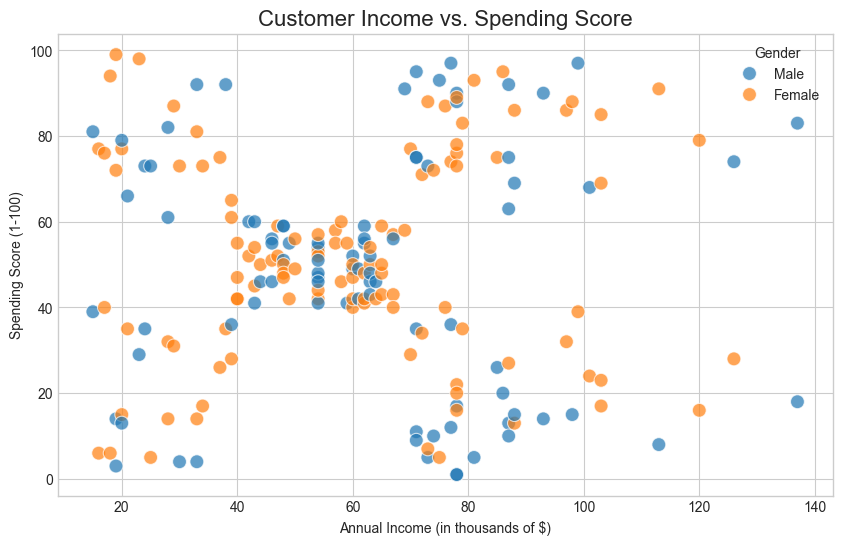

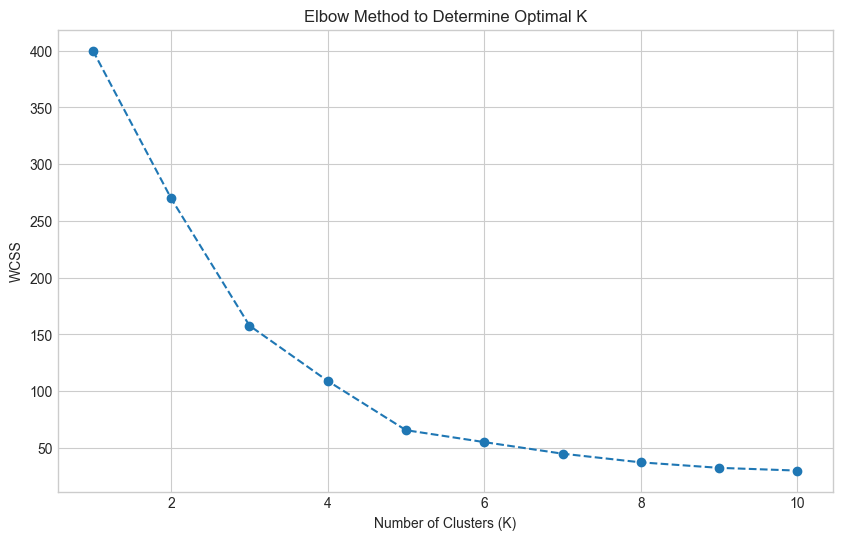

K-Means clustering complete. Cluster labels have been added to the DataFrame.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


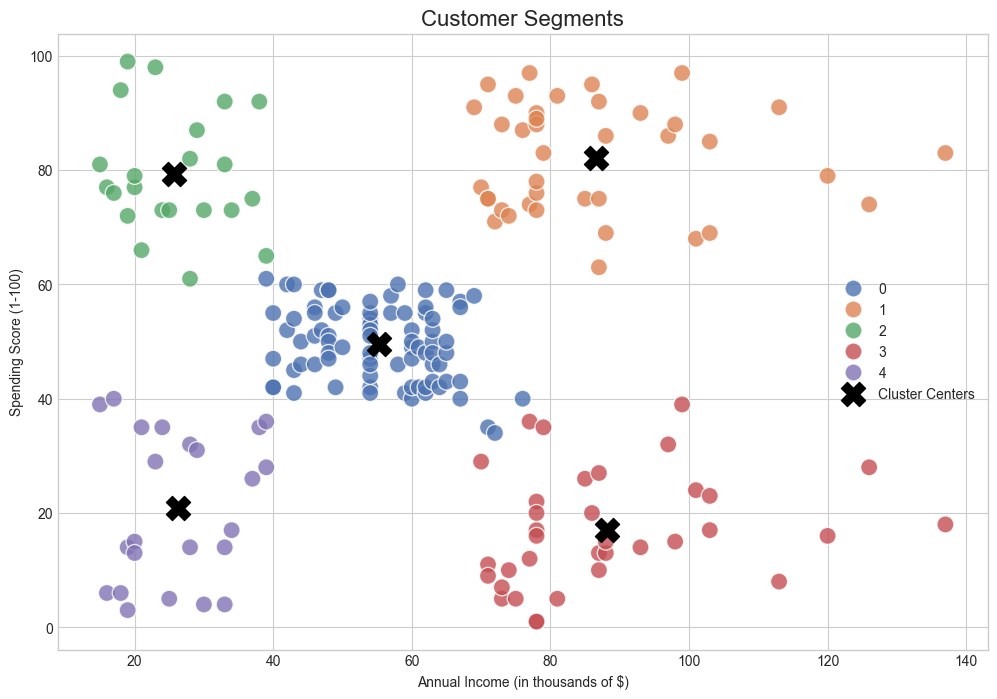

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading and exploring the customer dataset...")

# --- Load the Data ---
try:
    df = pd.read_csv('Mall_Customers.csv')
    print("Dataset successfully loaded!")
except FileNotFoundError:
    print("File not found! Make sure 'Mall_Customers.csv' is in your project folder.")

# --- Initial Exploration ---
print("\nFirst 5 rows of the data:")
display(df.head())

print("\nData Info:")
df.info()

# --- Exploratory Data Analysis (EDA) ---
print("\nVisualizing the relationship between income and spending score...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Gender', 
                s=100, 
                alpha=0.7)

plt.title('Customer Income vs. Spending Score', fontsize=16)
plt.xlabel('Annual Income (in thousands of $)')
plt.ylabel('Spending Score (1-100)')
plt.show()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- Prepare the Data ---
# We'll use 'Annual Income' and 'Spending Score' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# It's very important to scale the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Use the Elbow Method to Find the Optimal Number of Clusters ---
wcss = [] # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# --- Apply K-Means Clustering ---
# Based on the elbow plot, K=5 seems to be the optimal number of clusters.
K = 5
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42, n_init=10)
# Fit the model and predict the cluster for each customer
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to our original DataFrame
df['Cluster'] = y_kmeans

print("K-Means clustering complete. Cluster labels have been added to the DataFrame.")
display(df.head())

# --- Visualize the Discovered Clusters ---
plt.figure(figsize=(12, 8))

# Create a scatter plot, coloring each point by its assigned 'Cluster' label
sns.scatterplot(data=df, 
                x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Cluster',        # Color by the new 'Cluster' column
                palette='deep',       # Use a nice color scheme
                s=150,                # Make the points larger
                alpha=0.8,
                legend='full')

# Get the center point of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the center of each cluster as a black 'X'
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            s=300, c='black', marker='X', label='Cluster Centers')

plt.title('Customer Segments', fontsize=16)
plt.xlabel('Annual Income (in thousands of $)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()